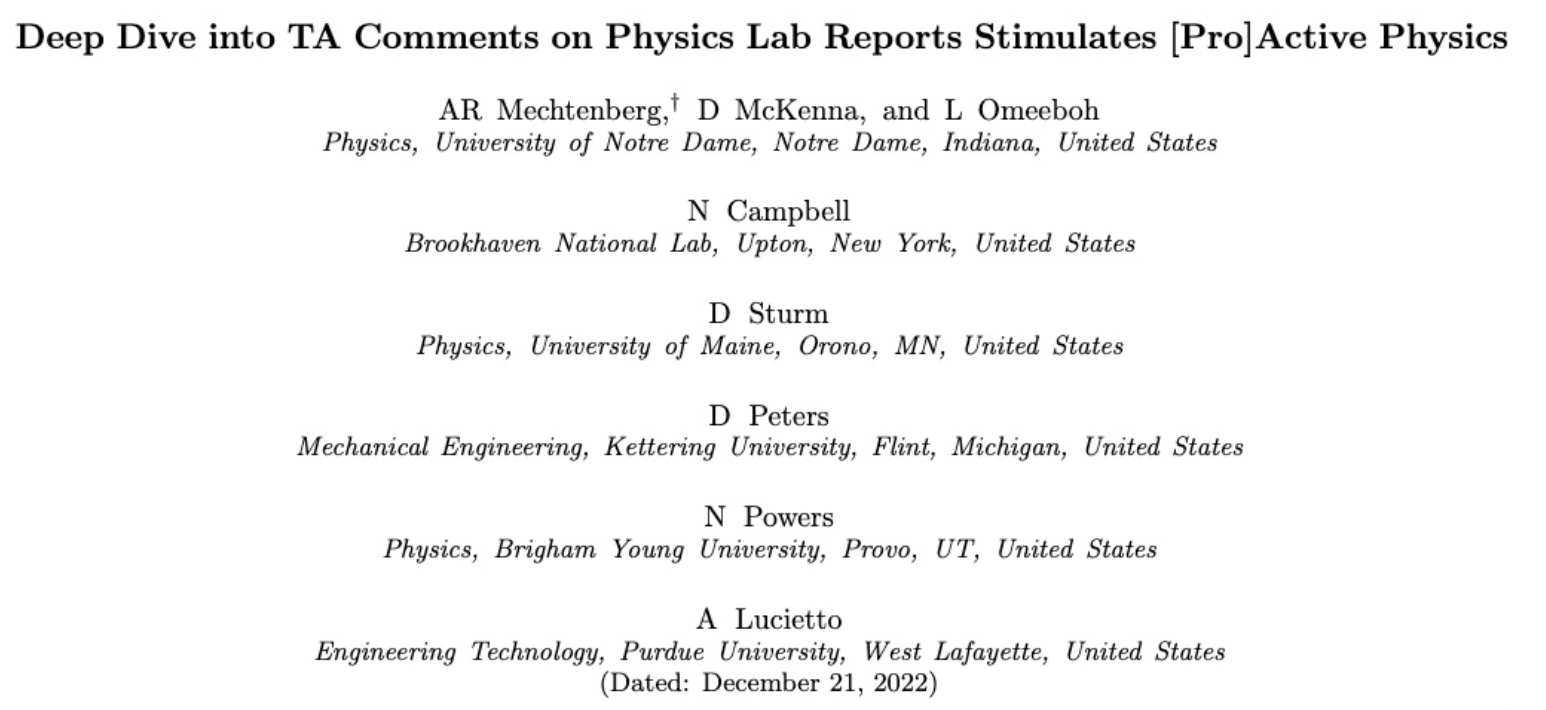

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame
import math
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import google.colab

In [2]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 352 (delta 123), reused 137 (delta 53), pack-reused 113 (from 1)
Receiving objects: 100% (352/352), 39.70 MiB | 8.55 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [3]:
%cd APS-PRPER-ExD

!git pull

/content/APS-PRPER-ExD
Already up to date.


In [4]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [5]:
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()
print(data_group2_df)

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

data_group4_df = pd.read_excel(path_to_colab / 'Paper_1/data_group4.xlsx', header = 0,sheet_name = 'Sheet1')
data_group4_np = data_group4_df.to_numpy()

#print(data_group4_df)

   Section     CIF  CIF_STDEV  Students  CIF_STERR      Tone  Tone_STDEV  \
0       11  0.7675   0.123333        44   0.018593  0.461147    0.170597   
1       12  0.8000   0.223333        42   0.034461  0.462305    0.177384   
2       13  0.7500   0.090000        27   0.017321  0.460880    0.130976   
3       21  0.7525   0.186667        40   0.029515  0.401149    0.177180   
4       22  0.6500   0.230000        41   0.035920  0.375568    0.194491   
5       23  0.7500   0.093333        23   0.019461  0.407369    0.193277   
6       24  0.7500   0.123333        41   0.019261  0.386538    0.228199   
7       25  0.7575   0.123333        39   0.019749  0.470503    0.284406   
8       27  0.9250   0.163333        40   0.025825  0.460581    0.148118   
9       28  0.7650   0.133333        41   0.020823  0.445988    0.252514   

   Tone_Count  Tone_STERR  Word Count  ...  Probative_Count  Probative_STERR  \
0        1377    0.004597    0.254097  ...             1377         0.010964   
1  

In [6]:
Tone = data_group2_df['Tone']
Word_Count = data_group2_df['Word Count']
Complexity = data_group2_df['Complexity']
Probative = data_group2_df['Probative']
CIF = data_group2_df['CIF']

Tone_stdev = data_group2_df['Tone_STDEV']
Word_Count_stdev = data_group2_df['WC_STDEV']
Complexity_stdev = data_group2_df['Complexity_STDEV']
Probative_stdev = data_group2_df['Probative_STDEV']
CIF_stdev = data_group2_df['CIF_STDEV']

Tone_sterr = data_group2_df['Tone_STERR']
Word_Count_sterr = data_group2_df['WC_STERR']
Complexity_sterr = data_group2_df['Complexity_STERR']
Probative_sterr = data_group2_df['Probative_STERR']
CIF_sterr = data_group2_df['CIF_STERR']

Tone_COUNT = data_group2_df['Tone_Count']
Word_Count_COUNT = data_group2_df['WC_Count']
Complexity_COUNT = data_group2_df['Complexity_Count']
Probative_COUNT = data_group2_df['Probative_Count']
CIF_COUNT = data_group2_df['Students']

[0.7675 0.8    0.75   0.7525 0.65   0.75   0.75   0.7575 0.925  0.765 ]
[0.0185932  0.03446108 0.01732051 0.02951459 0.03591997 0.01946135
 0.01926143 0.01974914 0.02582527 0.02082317]
[0.8005326  0.77454599 0.80414509 0.70670771 0.71645192 0.76411505
 0.72027293 0.78490038 0.85425731 0.74352839]
[0.0330326  0.02545401 0.05414509 0.04579229 0.06645192 0.01411505
 0.02972707 0.02740038 0.07074269 0.02147161]


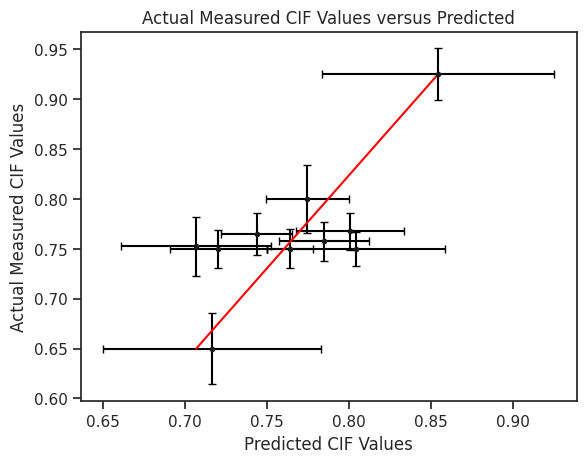

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CIF   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              478.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    1.21e-07
Time:                        16:31:33   Log-Likelihood:                          17.278
No. Observations:                  10   AIC:                                     -26.56
Df Residuals:                       6   BIC:                                     -25.35
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tone           0.8895      0.545      1.631      0.154      -0.445       2.224
Probative      0.2548      0.343      0.742      0.486      -0.585       1.094
Word Count    -0.0338      0.643     -0.053      0.960      -1.607       1.539
Complexity     0.3117      0.330      0.946      0.381      -0.495       1.118
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   2.831
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.622
Skew:                           0.002   Prob(JB):                        0.733
Kurtosis:                       1.778   Cond. No.                         50.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 640x480 with 0 Axes>

In [7]:
X=data_group2_df[['Tone','Probative','Word Count','Complexity']]
X = X[:]
Y=data_group2_df[['CIF']]
Y = Y[:]
CIF=Y[:]
CIF_np = CIF.to_numpy()
CIF_np = CIF_np.flatten()
print(CIF_np)
CIF_err=data_group2_df[['CIF_STERR']]
CIF_err_np = CIF_err.to_numpy()
CIF_err_np = CIF_err_np.flatten()
print(CIF_err_np)

model = sm.OLS(Y, X)
results = model.fit()

# Make predictions
CIF_pred = results.predict(X)
CIF_pred = pd.DataFrame(CIF_pred, columns=['CIF_pred'])
CIF_pred_np = CIF_pred.to_numpy()
CIF_pred_np = CIF_pred_np.flatten()
print(CIF_pred_np)
CIF_pred_err = abs(CIF['CIF'] - CIF_pred['CIF_pred'])
CIF_pred_err = pd.DataFrame(CIF_pred_err, columns=['CIF_pred_err'])
CIF_pred_err_np = CIF_pred_err.to_numpy()
CIF_pred_err_np = CIF_pred_err_np.flatten()
print(CIF_pred_err_np)

x=CIF_pred_np
y=CIF_np

y_error=CIF_err_np
x_error=CIF_pred_err_np

plt.errorbar(x, y, xerr=x_error, yerr=y_error, capsize=3,fmt='.k', ecolor = "black")
plt.plot([x.min(), x.max()], [y.min(), y.max()], 'red')  # 45-degree line
plt.xlabel("Predicted CIF Values")
plt.ylabel("Actual Measured CIF Values")
plt.title("Actual Measured CIF Values versus Predicted")
plt.show()

plt.savefig('CIFS_Measured_versus_Predicted.png')


results.summary()

[0.7675 0.8    0.75   0.7525 0.65   0.75   0.75   0.7575 0.925  0.765 ]
[0.0185932  0.03446108 0.01732051 0.02951459 0.03591997 0.01946135
 0.01926143 0.01974914 0.02582527 0.02082317]
[0.79090322 0.7797039  0.82414997 0.7029986  0.71757254 0.74233438
 0.72043646 0.7852908  0.85199384 0.75153669]
[0.02340322 0.0202961  0.07414997 0.0495014  0.06757254 0.00766562
 0.02956354 0.0277908  0.07300616 0.01346331]


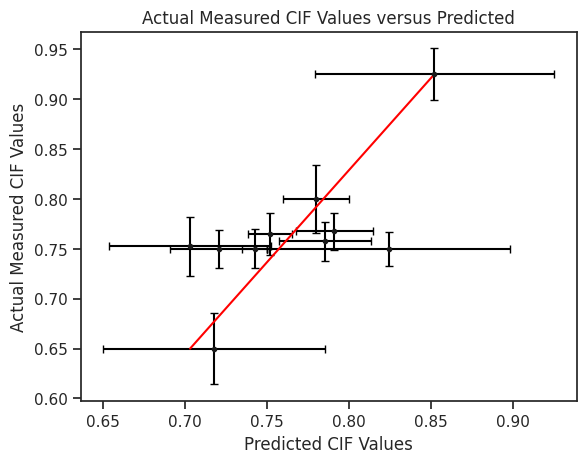

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CIF   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              665.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    5.87e-09
Time:                        16:31:34   Log-Likelihood:                          16.714
No. Observations:                  10   AIC:                                     -27.43
Df Residuals:                       7   BIC:                                     -26.52
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Tone               1.0375      0.474      2.190      0.065      -0.083       2.158
Probative          0.6996      0.361      1.939      0.094      -0.154       1.553
Tone_Probative    -0.6602      0.674     -0.979      0.360      -2.254       0.934
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   3.043
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.463
Skew:                          -0.220   Prob(JB):                        0.793
Kurtosis:                       2.042   Cond. No.                         40.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
Tone = data_group2_df[['Tone']]
Probative = data_group2_df[['Probative']]
data_group2_df['Tone_Probative'] = Tone['Tone']*Probative['Probative']

# print(data_group2_df)

X=data_group2_df[['Tone','Probative','Tone_Probative']]
X = X[:]
Y=data_group2_df[['CIF']]
Y = Y[:]
CIF=Y[:]
CIF_np = CIF.to_numpy()
CIF_np = CIF_np.flatten()
print(CIF_np)
CIF_err=data_group2_df[['CIF_STERR']]
CIF_err_np = CIF_err.to_numpy()
CIF_err_np = CIF_err_np.flatten()
print(CIF_err_np)

model = sm.OLS(Y, X)
results = model.fit()

# Make predictions
CIF_pred = results.predict(X)
CIF_pred = pd.DataFrame(CIF_pred, columns=['CIF_pred'])
CIF_pred_np = CIF_pred.to_numpy()
CIF_pred_np = CIF_pred_np.flatten()
print(CIF_pred_np)
CIF_pred_err = abs(CIF['CIF'] - CIF_pred['CIF_pred'])
CIF_pred_err = pd.DataFrame(CIF_pred_err, columns=['CIF_pred_err'])
CIF_pred_err_np = CIF_pred_err.to_numpy()
CIF_pred_err_np = CIF_pred_err_np.flatten()
print(CIF_pred_err_np)

x=CIF_pred_np
y=CIF_np

y_error=CIF_err_np
x_error=CIF_pred_err_np

plt.errorbar(x, y, xerr=x_error, yerr=y_error, capsize=3,fmt='.k', ecolor = "black")
plt.plot([x.min(), x.max()], [y.min(), y.max()], 'red')  # 45-degree line
plt.xlabel("Predicted CIF Values")
plt.ylabel("Actual Measured CIF Values")
plt.title("Actual Measured CIF Values versus Predicted")
plt.show()


results.summary()

[0.7675 0.8    0.75   0.7525 0.65   0.75   0.75   0.7575 0.925  0.765 ]
[0.0185932  0.03446108 0.01732051 0.02951459 0.03591997 0.01946135
 0.01926143 0.01974914 0.02582527 0.02082317]
[0.80173729 0.7891888  0.84003514 0.68456005 0.69040718 0.72823495
 0.69754414 0.79843218 0.87204663 0.75169439]
[0.03423729 0.0108112  0.09003514 0.06793995 0.04040718 0.02176505
 0.05245586 0.04093218 0.05295337 0.01330561]


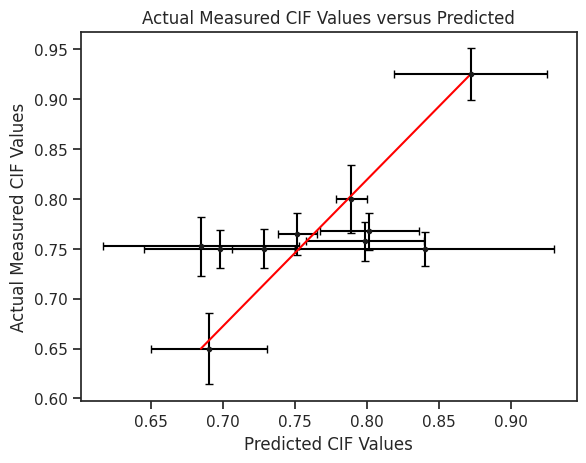

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CIF   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1003.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                    2.49e-10
Time:                        16:31:34   Log-Likelihood:                          16.072
No. Observations:                  10   AIC:                                     -28.14
Df Residuals:                       8   BIC:                                     -27.54
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tone           0.9557      0.465      2.054      0.074      -0.117       2.029
Probative      0.4565      0.261      1.747      0.119      -0.146       1.059
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   3.095
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.589
Skew:                          -0.334   Prob(JB):                        0.745
Kurtosis:                       2.016   Cond. No.                         27.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
X=data_group2_df[['Tone','Probative']]
X = X[:]
Y=data_group2_df[['CIF']]
Y = Y[:]
CIF=Y[:]
CIF_np = CIF.to_numpy()
CIF_np = CIF_np.flatten()
print(CIF_np)
CIF_err=data_group2_df[['CIF_STERR']]
CIF_err_np = CIF_err.to_numpy()
CIF_err_np = CIF_err_np.flatten()
print(CIF_err_np)

model = sm.OLS(Y, X)
results = model.fit()

# Make predictions
CIF_pred = results.predict(X)
CIF_pred = pd.DataFrame(CIF_pred, columns=['CIF_pred'])
CIF_pred_np = CIF_pred.to_numpy()
CIF_pred_np = CIF_pred_np.flatten()
print(CIF_pred_np)
CIF_pred_err = abs(CIF['CIF'] - CIF_pred['CIF_pred'])
CIF_pred_err = pd.DataFrame(CIF_pred_err, columns=['CIF_pred_err'])
CIF_pred_err_np = CIF_pred_err.to_numpy()
CIF_pred_err_np = CIF_pred_err_np.flatten()
print(CIF_pred_err_np)

x=CIF_pred_np
y=CIF_np

y_error=CIF_err_np
x_error=CIF_pred_err_np

plt.errorbar(x, y, xerr=x_error, yerr=y_error, capsize=3,fmt='.k', ecolor = "black")
plt.plot([x.min(), x.max()], [y.min(), y.max()], 'red')  # 45-degree line
plt.xlabel("Predicted CIF Values")
plt.ylabel("Actual Measured CIF Values")
plt.title("Actual Measured CIF Values versus Predicted")
plt.show()


results.summary()